# Problem Statment
The company has collected regional sales data across multiple products, customers, and time periods. While the dataset contains valuable information on revenue, costs, profit, regions, and customer activity, this information has not yet been fully analyzed to guide strategic decisions.

Management needs to understand:

Which regions and products contribute most to revenue and profit.

Where sales performance is lagging and why.

How customer behavior (frequency, recency, spending) impacts overall revenue.

Whether marketing efforts (e.g., promotions, discounts) are improving sales or reducing margins.

What the revenue trend looks like over time, and what can be expected in the future.

Therefore, the core problem is:
## “How can the company leverage regional sales data to identify growth opportunities, optimize resource allocation, improve profitability, and make data-driven strategic decisions?”

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\BAB AL SAFA\Downloads\Sales-Analysis-main\Sales-Analysis-main\Regional Sales Dataset.xlsx")
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
xls = pd.ExcelFile(r"C:\Users\BAB AL SAFA\Downloads\Sales-Analysis-main\Sales-Analysis-main\Regional Sales Dataset.xlsx")
print(xls.sheet_names)

['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2017 Budgets']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
OrderNumber,64104,10684,SO - 0009753,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrderDate,64104,NaN,NaN,NaN,2016-01-29 01:28:20.935979008,2014-01-01 00:00:00,2015-01-13 00:00:00,2016-01-27 00:00:00,2017-02-13 00:00:00,2018-02-28 00:00:00,NaN
Customer Name Index,64104.0,NaN,NaN,NaN,87.480064,1.0,45.0,87.0,130.0,175.0,49.884946
Channel,64104,3,Wholesale,34596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Currency Code,64104,1,USD,64104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warehouse Code,64104,4,AXW291,30204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery Region Index,64104.0,NaN,NaN,NaN,495.086609,1.0,247.0,493.0,742.0,994.0,285.645893
Product Description Index,64104.0,NaN,NaN,NaN,14.913141,1.0,6.0,15.0,24.0,30.0,8.787032
Order Quantity,64104.0,NaN,NaN,NaN,8.441689,5.0,6.0,8.0,10.0,12.0,2.276217
Unit Price,64104.0,NaN,NaN,NaN,2284.380803,167.5,1031.8,1855.9,3606.275,6566.0,1663.598141


In [10]:
df.shape, df.dtypes


((64104, 12),
 OrderNumber                          object
 OrderDate                    datetime64[ns]
 Customer Name Index                   int64
 Channel                              object
 Currency Code                        object
 Warehouse Code                       object
 Delivery Region Index                 int64
 Product Description Index             int64
 Order Quantity                        int64
 Unit Price                          float64
 Line Total                          float64
 Total Unit Cost                     float64
 dtype: object)

In [13]:
df.corr(numeric_only=True)

,Customer Name Index,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
Customer Name Index,1.000000,-0.002736,-0.035346,0.007998,-0.019456,-0.016692,-0.012539
Delivery Region Index,-0.002736,1.000000,-0.002556,0.000785,0.003910,0.004351,0.003576
Product Description Index,-0.035346,-0.002556,1.000000,-0.001821,-0.011523,-0.012890,-0.016178
Order Quantity,0.007998,0.000785,-0.001821,1.000000,-0.000884,0.335208,-0.004765
Unit Price,-0.019456,0.003910,-0.011523,-0.000884,1.000000,0.909274,0.941904
Line Total,-0.016692,0.004351,-0.012890,0.335208,0.909274,1.000000,0.854934
Total Unit Cost,-0.012539,0.003576,-0.016178,-0.004765,0.941904,0.854934,1.000000


<Axes: >

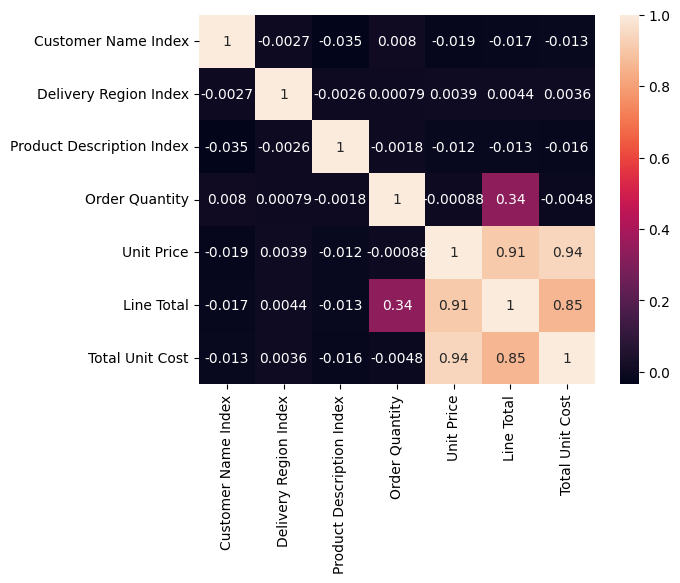

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [17]:
df['Profit'] = df['Line Total'] - df['Total Unit Cost']
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Profit
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930


In [21]:
df = df.rename(columns={'Line Total': 'Revenue','Delivery Region Index':'Region'})
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Region,Product Description Index,Order Quantity,Unit Price,Revenue,Total Unit Cost,Profit
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,20807.922
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,4606.719
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,40834.490
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,24787.722


In [22]:
df.nunique()

OrderNumber                  10684
OrderDate                     1520
Customer Name Index            175
Channel                          3
Currency Code                    1
Warehouse Code                   4
Region                         993
Product Description Index       30
Order Quantity                   8
Unit Price                     664
Revenue                       2535
Total Unit Cost               5581
Profit                        7595
dtype: int64

In [24]:
region = df.groupby('Region')[['Revenue','Profit']].sum().reset_index()
region

,Region,Revenue,Profit
0,1,1384622.0,1280583.194
1,2,1567002.7,1453605.736
2,3,1688125.3,1562796.976
3,4,1397861.2,1299648.915
4,5,517320.4,478881.428
...,...,...,...
988,990,1370518.5,1264269.297
989,991,1141137.3,1052609.463
990,992,1436486.7,1329698.080
991,993,799919.7,741004.925


In [25]:
region.corr()

,Region,Revenue,Profit
Region,1.000000,-0.021689,-0.021418
Revenue,-0.021689,1.000000,0.999864
Profit,-0.021418,0.999864,1.000000


<Axes: >

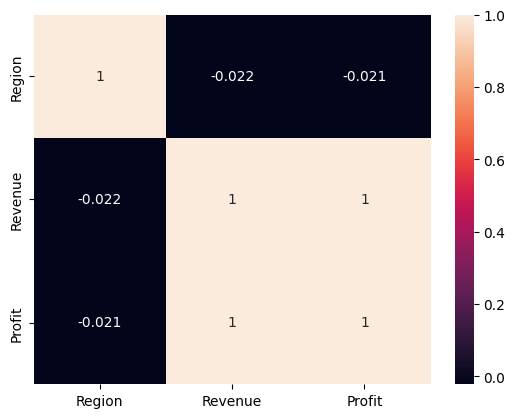

In [26]:
sns.heatmap(region.corr(), annot=True)

### Total revenue gain from each channel for this 4 years
and based on the analysis Wholesale has the largest revenue

In [29]:
df.groupby('Channel')['Revenue'].sum().sort_values(ascending=False)

Channel
Wholesale      668197244.4
Distributor    387139788.6
Export         180631866.0
Name: Revenue, dtype: float64

### Total revenue based on the channels but now based on the date


In [43]:
df['month'] = df['OrderDate'].dt.strftime('%B')
df_channel_by_month = df.groupby(['Channel', 'month'])['Revenue'].sum().sort_values(ascending=False)


In [36]:
df['year'] = df['OrderDate'].dt.year 

In [45]:
df_channel_by_year =df.groupby(['Channel', 'year'])['Revenue'].sum()

In [64]:
corr=region = df.groupby(['Channel','year','month'])['Revenue'].sum().reset_index().sort_values(by='year',ascending=True)
corr.head(30)

,Channel,year,month,Revenue
0,Distributor,2014,April,7551972.0
1,Distributor,2014,August,8536778.2
2,Distributor,2014,December,7843254.5
3,Distributor,2014,February,7840621.4
4,Distributor,2014,January,7815422.7
5,Distributor,2014,July,7288467.7
6,Distributor,2014,June,7523664.5
7,Distributor,2014,March,7207424.5
8,Distributor,2014,May,7531496.8
9,Distributor,2014,November,8589540.7


,year,Revenue
year,1.000000,-0.012368
Revenue,-0.012368,1.000000
